<h1 style="text-align: center;"><strong>TP - Optimisation</strong></h1>


*Auteurs: Rodolphe le Riche, Loris Cros, Armance Darrobers*


Ce TP a pour objectif d'illustrer par des exemples pratiques le cours d'Optimisation, vu dans le cadre de l'EEIA 2025. Il se déroule en 3 parties successives.
Dans la **première partie**, l'objectif sera de coder une version simple de l'algorithme de **descente du gradient**, et de l'appliquer à une fonction convexe, ici f(x)=x², afin de déterminer le minimum de la fonction.

Dans la **seconde partie**, un code plus élaboré pour la descente de gradient sera fourni, et les **résultats de minimisation** obtenus pour diverses fonctions pourront être analysés. On analysera notamment l'influence d'un paramètre lambda d'une fonction à optimiser sur les résultats obtenus.

Dans un **troisième temps**, on se focalisera sur la **création d'un réseau de neurone**, à partir d'un code fourni. Ici, le code fourni implémentera un réseau de neurone afin d'effectuer une régression sur un jeu de donnée, c'est-à-dire retrouver grâce au réseau de neurone la fonction qui relie les entrées et les sorties de l'échantillon.

Enfin, dans une dernière partie, il est attendu que les élèves s'inspirent de cet exemple pour recréer leur propre réseau de neurone ayant un objectif similaire, et en analysent les résultats.



Avant toute chose, on importe les bibliothèques python nécessaires à notre exercice. 
- *matplotlib.pyplot* est utilisée pour tracer les différents graphes du TP.
- *optimcourse* est une bibliothèque "faite maison", dans laquelle plusieurs fonctions ont été codées pour qu'elles puissent être ici directement utilisées : une version poussée de l'algorithme de descente du gradient, des exemples de fonction d'activation et des exemples de fonction test...



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

from optimcourse.gradient_descent import gradient_descent, gradient_finite_diff
from optimcourse.optim_utilities import print_rec
from optimcourse.forward_propagation import (
    forward_propagation,
    create_weights,
    vector_to_weights,
    weights_to_vector)
from optimcourse.activation_functions import (
    relu,
    sigmoid,
    linear,
    leaky_relu
)
from optimcourse.test_functions import (
    linear_function,
    ackley,
    sphere,
    quadratic,
    rosen,
    L1norm,
    sphereL1
)
from optimcourse.restarted_gradient_descent import restarted_gradient_descent

np.random.seed(42)

# Partie 1 : Algorithme de descente de gradient

Dans cette première partie, l'objectif est d'apprendre à coder une version simple de l'algorithme de descente du gradient en dimension 1. Comme vu dans le cours, l'algorithme de descente de gradient est une méthode d'optimisation qui permet de minimiser une fonction en suivant la direction opposée à celle du gradient. À chaque itération, les paramètres sont ajustés en fonction du gradient de la fonction par rapport à ces paramètres, avec un certain pas d’apprentissage (ou taux d’apprentissage). Ce processus est répété jusqu’à ce que la fonction atteigne un minimum ou qu’un critère d’arrêt soit satisfait. 



Pour implémenter la fonction de descente de gradient, il est d'abord nécessaire de coder une première fonction auxiliaire qui calcule le gradient du fonction f au niveau d'un point x. Pour cela, on prend en entrée de cette fonction "dérivée" un petit pas epsilon. La formule du gradient en dimension 1 est :

$$ \frac{df(x)}{dx} \simeq \frac{f(x+\epsilon)-f(x)}{\epsilon}



#### Question 1:
Coder une fonction derivee(func, x, epsilon), qui prend en entrée une fonction $func$, un point $x$ et un pas $epsilon$, et qui renvoie la dérivée de la fonction $f$ en $x.$

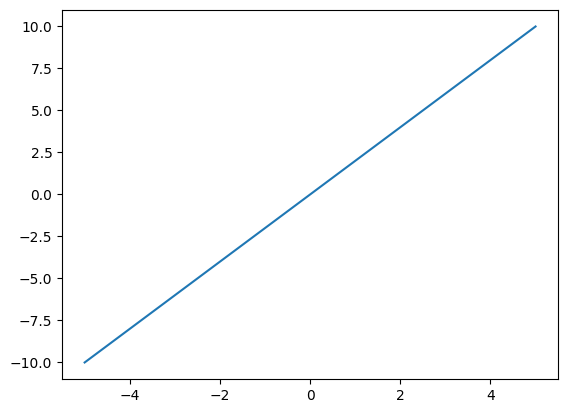

In [ ]:
def derivee(func, x, epsilon):
        
    f_x=func(x)
    

    f_xh=func(x+epsilon)

    grad=(f_xh-f_x)/epsilon
    return grad




    

#### Question 2:
A partir de cette fonction derivée, afficher la fonction dérivée de la fonction f$$f(x)=x²$$ dans l'intervalle  $[-5 : 5]$

*Indice : vous pouvez appliquer votre fonction dérivée à un vecteur x composé de toutes les valeurs de l'axe des abscisses.*

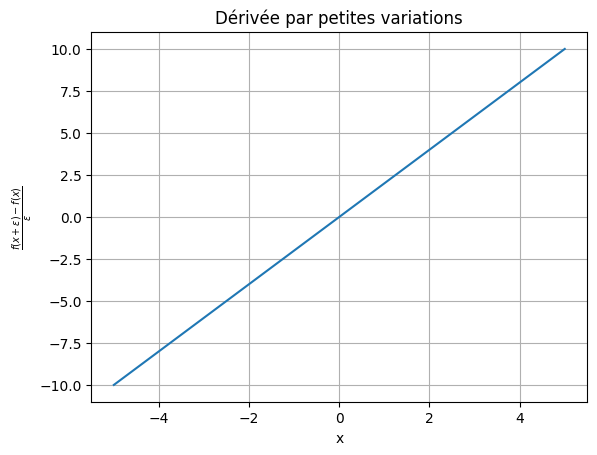

In [96]:
def square(x):
    return x**2

x=np.linspace(-5,5,1000)

grd=[derivee(square,x[i],1e-3) for i in range(1000)]

# grd=derivee(square,x,1e-3)
plt.title("Dérivée par petites variations")
plt.xlabel("x")
plt.ylabel(r"$\frac{f(x+\epsilon)-f(x)}{\epsilon}$")
plt.grid(True)

plt.plot(x,grd)

#### Question 3 
Vérifiez que la fonction tracée ci-dessus corresponde bien à la fonction dérivée de la fonction $f$, qu'on peut trouver analytiquement. Tracer cette fonction dérivée dans l'intervalle  $[-5 : 5].$

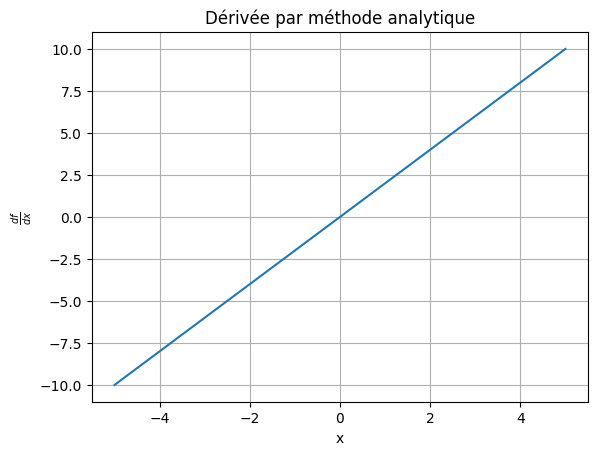

In [99]:
def square_derivee(x):
    return 2*x

x=np.linspace(-5,5,1000)

grd=square_derivee(x)

plt.title("Dérivée par méthode analytique")
plt.xlabel("x")
plt.ylabel(r"$\frac{df}{dx}$")
plt.grid(True)
plt.plot(x,grd)

Bravo ! A cette étape, vous avez codé une fonction *derivée* qui permet de calculer le gradient d'une fonction en un point.

Maintenant, on va aller plus loin, en utilisant cette fonction *dérivée* pour coder un algorithme de gradient. 

#### Question 4
Écrivez une fonction nommée $descente-grad(func, x0, pas, epsilon, limit, max_iter)$ qui applique l'algorithme de descente de gradient sur une fonction $func$. L’algorithme commence à partir d’un point initial $x0$ et progresse par pas de taille $pas$. L'exécution s'arrête si la différence entre deux points consécutifs devient inférieure à la valeur seuil $limit$, ou si le nombre maximal d’itérations $max_iter$ est atteint. Le paramètre *epsilon* égal à $10^{-3}$ sera utilisé pour approximer numériquement le gradient de la fonction, grace à la fonction $derivee(func, x, epsilon) $ implémentée précédemment.
La fonction devra renvoyer 2 variables : le résultat de la minimisation, ie la valeur de $x $pour laquelle la fonction $f $est minimale, ainsi que la liste de tous les x intermédiaires par lesquels l'algorithme est passé.

2.1970568746496113
limite prediction atteinte
80
-4.9961180481675244e-05 -4.9951475602094054e-05


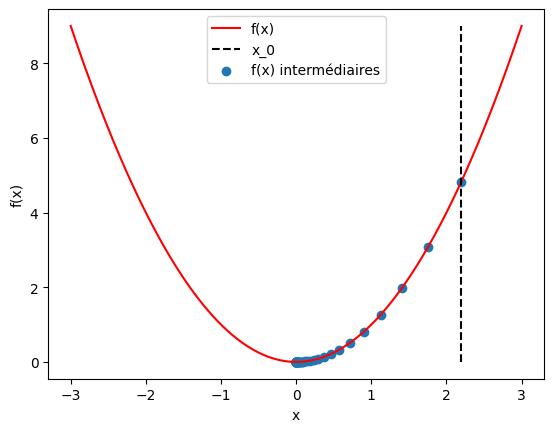

In [ ]:
def descente_grad(func, x0,pas,epsilon,limit,max_iter):
    condition=False
    x=x0
    conteur=0
    liste_x=np.zeros(max_iter)

    while not condition :
        liste_x[conteur]=x
        x_prec=x
        der=derivee(func,x,epsilon)
        x=x-pas*der

        if np.abs(x-x_prec)<limit:
            print("limite prediction atteinte")
            condition=True
        conteur +=1

        if conteur > max_iter:
            print("Limites itérations atteinte")
            condition=True
    print(conteur)
    return x,liste_x[:conteur]
        



#### Question 5:
Utilisez votre fonction descente_grad sur la fonction $f(x)=x²$ dans l'intervalle dans $[-5,5]$, et affichez sur un même graphe la fonction f et les valeurs de f(x) intermédiaires obtenues au cours de l'algorithme. On prendra pour valeur initiale $x_0$ un point aléatoire dans $[-5,5]$. Vérifiez que la valeur minimale trouvée par l'algorithme corresponde bien au minimum de la courbe que vous identifierez visuellement.

0.606690070459253
limite prediction atteinte
75
-4.9967284640119185e-05


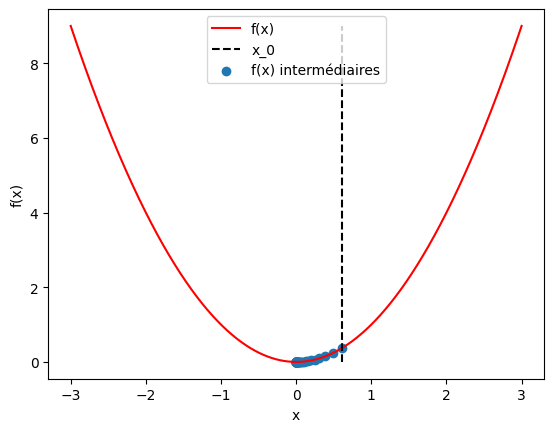

In [108]:
x0=np.random.uniform(-3,3)
print(x0)
x,liste_x=descente_grad(square,x0,0.1,0.0001,1e-8,1000)
liste_plot=np.linspace(-3,3,10000)
plt.plot(liste_plot,square(liste_plot),color="red",label="f(x)")
plt.vlines(x0,0,9,linestyle="--",color="k",label=r"x_0")
plt.scatter(liste_x,square(liste_x),label="f(x) intermédiaires")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()

print(x)

A cette étape, on a codé pour faire une descente de gradient, qui permet de trouver le minimum d'une fonction $f.$ La descente de gradient est donc une méthode d'optimisation, qui permet de trouver le $minimum$ d'une fonction. On l'utilisera  plus tard dans le cadre de création d'un réseau de neurone, afin de trouver le minimum de la fonction $coût$, qui dépend des $paramètres$ du modèle et des $entrées$ observées. La sortie de l'algorithme d'optimisation nous donnera les valeurs des paramètres du modèle qui permettent de minimiser la fonction coût. Ce sera donc les meilleurs paramètres à utiliser pour notre modèle afin de correspondre au mieux aux données d'entrées.

# Partie 2: Descente de gradient en dimension 2

Dans cette partie, pas d'inquiétude, il n'y a pas à coder ! L'objectif est d'observer les résultats de la fonction avancée de descente de gradient, qui fonctionne en plusieurs dimensions.

**Remarque 1 :** En général, il est utile de tracer la fonction à optimiser sur un graphe afin d'observer visuellement son minimum.


**Remarque 2:** Lorsque l’on cherche à optimiser une fonction en *dimension 1,* cela signifie que la fonction **f** ne dépend que d’une seule variable **x.** On peut alors la représenter graphiquement en traçant f(x) en fonction de x sur un plan 2D.
En *dimension 2,* la fonction dépend de deux variables x et y, donc on représente **f(x, y)** à l’aide d’un graphe en 3D.
Au-delà de deux dimensions, la visualisation directe devient difficile, voire impossible, et l’analyse se fait alors de manière abstraite ou numérique.

Le code suivant permet de dessiner les graphes de fonctions à 2 variables. On obtient donc des graphes 3D, et on parlera plus tard d'optimisation de dimension 2 (car on veut optimiser $f$ par rapport à $x_1$ et $x_2$).

Plusieurs fonctions de test ont été déjà importée depuis le fichier python *test_functions.py*. Vous pouvez vous amuser à changer le nom du paramètre fun dans le code, afin de changer la fonction qui sera affichée.
Pour fun, vous pouvez choisir au choix d'afficher les fonctions suivantes:
- linear_function,
- ackley,
- sphere,
- quadratic,
- rosen,
- L1norm

#### Question 1:
 Jouez à tester différentes fonctions, et à observer visuellement le minimum de chacune d'entre elles. Quels commentaires pouvez vous faire sur certaines de ces fonctions ?

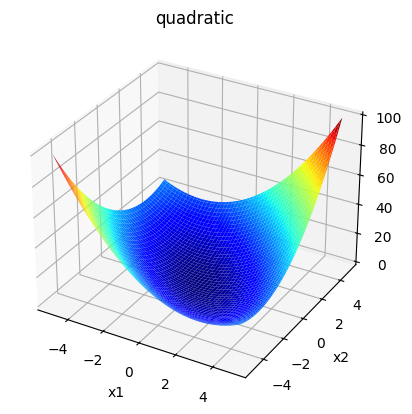

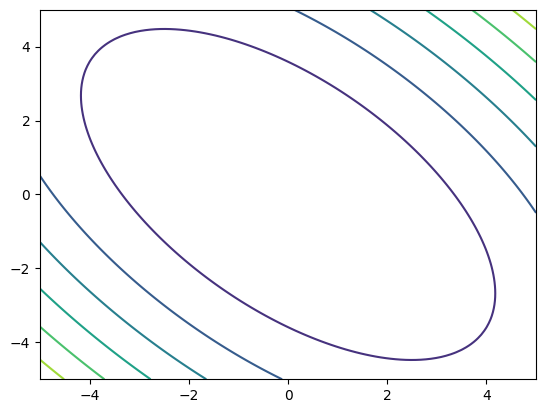

In [144]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = quadratic # other test_functions can be plotted, cf. test_functions.py

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 

x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
#axis.set_zlim(0,150)
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()
# figure.savefig('plot.pdf')

Maintenant que nous avons visuellement vu quel avait l'air d'être le minimum de chacune de ces fonctions, nous allons essayer de retrouver la valeur de ce minimum grâce à l'algorithme de la descente de gradient. Pour pouvoir optimiser les fonctions en dimension 2 (ou plus), la fonction déjà implémentée *gradient_descent.py* sera utilisée. 
Les plus curieux d'entre vous sont libres d'aller regarder dans la fonction importée le code, afin d'oserver comment il a été fait. Le concept reste identique à l'algorithme qui a été implémenté en partie 1 pour la dimension 1.

#### Question 2:
 Jouez avec la fonction suivante, afin de trouver le minimum de la fonction fun. Vous pouvez vérifier que le minimum de la fonction donné corresponde bien au minimum  observé visuellement à la **question 1.**
Comme précédemment, pour fun, vous pouvez choisir au choix d'afficher les fonctions suivantes:
- linear_function,
- ackley,
- sphere,
- quadratic,
- rosen,
- L1norm

**Remarque**: Les fonctions peuvent aussi être définies pour des dimensions supérieures à 2, et vous pouvez donc changer la variable dim dans le code. 

search stopped after 585 evaluations of f because of too small step 
best objective function = 3.2371479692107084e-08
best x = [-3.23679165e-08 -3.56314439e-12]


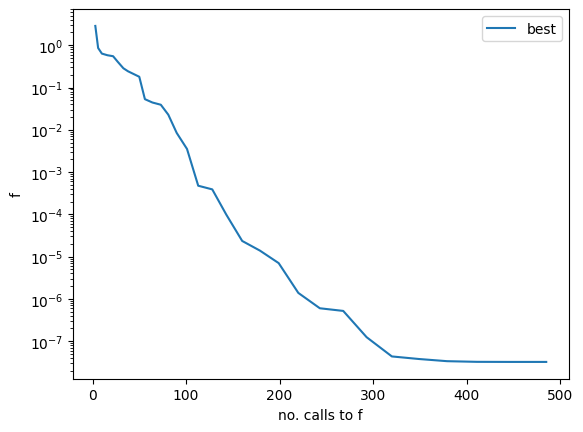

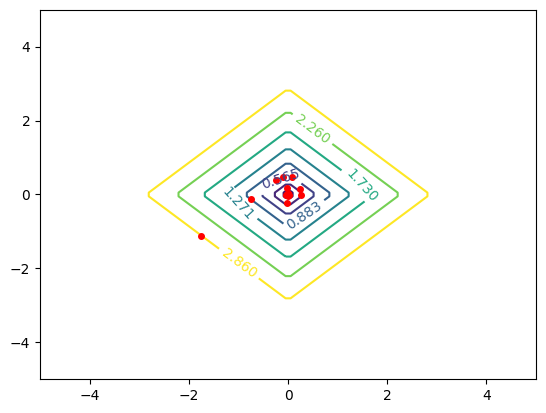

In [145]:
#########################
# function definition

fun = L1norm
dim = 2
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)

budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
# res = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,
                       budget=budget,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,
                       printlevel=printlevel)

#########################
# reporting
print_rec(res=res, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)


### Considérons un exemple afin de mieux comprendre le code.

Prenons maintenant comme fonction test à minimiser une fonction $f(x)$ couramment utilisée en machine learning :


$$ f(x) = \sum_{i=1}^n (x_i - c_i)^2 + \lambda \sum_{i=1}^n \lvert x_i\rvert \quad,\quad \lambda \ge 0 $$
$$ c_i = i \quad \text{ and } \quad -5 = LB_i \le x_i \le UB_i = 5 \quad,\quad i=1,\ldots,n $$  

- *Premier terme:* il s'agit d'une fonction sphérique centrée en $c$. C’est un modèle simplifié de l’erreur quadratique moyenne d’un réseau de neurones, où $c$ correspond aux poids qui minimisent l’erreur d’apprentissage.

- *Deuxième terme :* il s’agit de la norme L1 multipliée par $\lambda$. Les $x_i$ représentent ici les poids d’un réseau de neurones.
Ce terme sert à améliorer l’erreur sur les données de test (généralisation).

La fonction $f$ est déjà implémentée dans le fichier test_functions.py sous le nom sphereL1.
Le paramètre $\lambda$ est défini directement dans la fonction (vous pouvez consulter le fichier avec votre éditeur Python préféré).


#### Question 3:
 Dans un premier temps, afficher la fonction à l'aide du code ci-dessous. Faites varier le paramètre lambda dans le code afin d'observer l'influence du paramètre lambda sur la fonction.

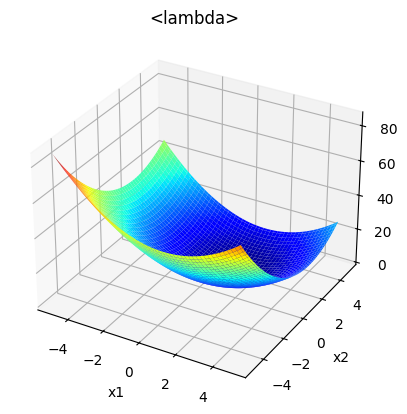

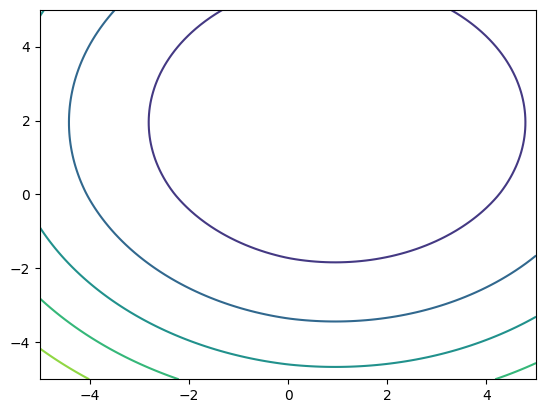

In [149]:
# function definition

lbda=0.1
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = lambda x: sphereL1(x,lbda)

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


#### Question 4:
Le code suivant est le même que celui vu précédemment. Il permet de calculer le minimum de la fonction à l'aide de l'algorithme de descente du gradient. Utilisez le code pour trouver le minimum de la fonction, et jouez avec le paramètre $lambda$.

search stopped after 1372 evaluations of f because of too small step 
best objective function = 386.02581996010116
best x = [-7.04132694e-08 -7.25446889e-08 -9.67633283e-03 -7.76508924e-09
 -3.22257692e-08 -5.88477771e-08 -9.29041725e-09 -3.53786774e-10
 -6.98895282e-08  1.46734718e-12]


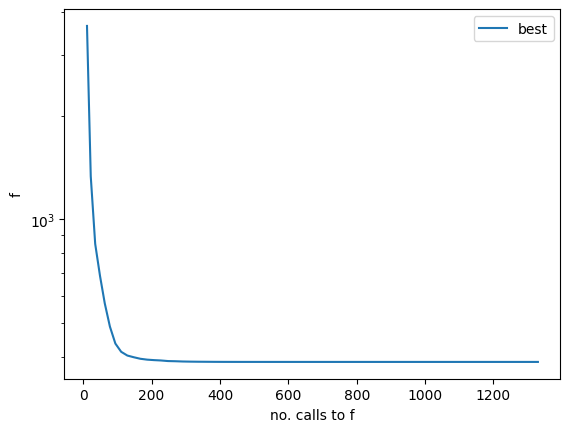

In [ ]:
#########################
# function definition
lbda=100
fun = lambda x:sphereL1(x,lbda)
dim = 10
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)

budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
# res = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,
                       budget=budget,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,
                       printlevel=printlevel)

#########################
# reporting
print_rec(res=res, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)


# Partie 3: Création d'un réseau de neurone

Dans cette partie, l'objectif est d'abord de comprendre et de s'approprier un code qui permet de créer un réseau de neurone. On pourra en observer les résultats. Dans un second temps, on pourra s'inspirer de ce code afin de créer un nouveau réseau de neurone.
Les plus curieux sont encouragés à jeter un coup d'oeil au code de la fonction `forward_propagation`, afin de comprendre en détail son implémentation.

Dans cette partie, l’objectif est d’abord de comprendre et de s’approprier un code Python qui permet de construire un réseau de neurones simple. Vous observerez les résultats produits par ce réseau sur un jeu de données d'entrée qu'on construira.

Dans un second temps, vous vous appuierez sur ce code comme base pour expérimenter la création et la modification de votre propre réseau de neurones.

Les plus curieux sont encouragés à explorer en détail la fonction forward_propagation, qui est au cœur du fonctionnement du réseau. Cela permettra de mieux comprendre comment les données circulent à travers les différentes couches et comment les prédictions sont générées.



#### Rappels sur les réseaux de neurones :
Un réseau de neurones artificiels est un modèle de machine learning inspiré du fonctionnement du cerveau humain. Il est constitué de neurones organisés en couches :

- Une couche d’entrée (input layer), qui reçoit les données initiales,

- Une ou plusieurs couches cachées (hidden layers), qui effectuent des transformations intermédiaires,

- Une couche de sortie (output layer), qui fournit le résultat du modèle (par exemple : une classe prédite, une valeur continue, etc.).

Chaque neurone effectue un calcul simple : il applique une fonction d’activation à une combinaison linéaire pondérée de ses entrées. Les poids (weights) et biais (biases) associés aux connexions entre les neurones sont ajustés pendant l’entraînement grâce à un algorithme de type descente de gradient, afin de minimiser une fonction de coût.

Parmi les éléments clés à maîtriser dans un réseau de neurones :

- La propagation avant (forward propagation) : calcule la sortie du réseau à partir des entrées,

- La rétropropagation (backpropagation) : ajuste les poids en fonction de l’erreur observée,

- Les fonctions d’activation : ReLU, sigmoid, tanh, etc., qui influencent la capacité du réseau à apprendre des fonctions complexes,

### Structure de donnée 

Le réseau de neurone suivant a 2 couches. La première couche part de 4 données d'entrée dans 3 neurones internes, et la deuxième couche part des 3 sorties du neurone interne et a 2 sorties. Aux biais des neurones sont aussi associés des poids.

Ici, la méthode de création du réseau de neurone va être constituée des étapes suivantes :

**Etape 1 -** D'abord, on va créer notre dataset de données d'entrées. Dans le cas particulier de ce TP, au lieu de prendre des données observées de la vie courante ( par exemple les données de la taille et du poids de personnes ainsi que leur genre), on va créer notre dataset directement nous même, afin d'avoir un jeu de donnée d'entrée. Le dataset de données "observées", qu'ici nous allons exeptionnellement créer nous-même, est composé d'un ensemble de variables d'entrées observée ainsi que la sortie observée.
Pour reprendre l'exemple précédent : si le réseau de neurone avait pour objectif de prédire le genre d'une personne en fonction de sa taille et son poids, le dataset serait constitué d'un ensemble de couples (entrée: taille et poids ;  sortie : genre) disposés dans une matrice entrée observé X et une matrice sortie Y.
Ici, le dataset est créé en prenant des points aléatoires dans les résultat d'une certaine fonction f connue. L'objectif sera donc que le réseau de neurone implémenté arrive à retrouver la fonction f qui relie les entrées et les sorties observées dans le dataset.

**Etape 2 -** Dans un second temps, on crée un reseau de neurones avec 1 couche, 2 entrées et une sortie initialisée avec des poids aléatoires. Le modèle du réseau de neurone sera déterminé par une liste de poids, weights. On trouvera la sortie du réseau de neurone à partir des données d'entrées grâce à la fonction **forward_propagation(inputs,weights,activation).** Cette fonction dépend du dataset d'entrée, des poids du modèle de réseau de neurone, et de la fonction d'activation. Pour la fonction d'activation, on prendra la sigmoïde.

**Etape 3 -** Une fonction coût sera implémentée. Elle dépend des poids et biais du réseau de neurone, et du jeu de donnée d'entrée. C'est cette fonction qu'il faut minimiser afin de trouver les meilleurs poids et biais du réseau, pour correspondre au mieux au jeu de donnée d'entrée. Ici, deux  fonctions d'erreurs, celle des moindre carrés (nommé mse pour Mean Squared Error) et de cross-entropy.

**Etape 4 -** Phase d'optimisation de la fonction coût grâce à l'algorithme de descente de gradient. Cette étape permet de trouver les poids du réseau de neurone qui induisent la fonction coût la plus basse possible. 

**Etape 5 -** Enfin, une fois que les poids optimaux sont obtenus, on a enfin notre modèle pour le réseau de neurone ! On pourra donc tracer la fonction trouvée et la comparer avec la fonction initiale à partir de laquelle on avait créer notre dataset.

In [154]:
inputs = np.array([[1,2,5,4],[1,0.2,0.15,0.024]])
weights = [
        np.array(
            [
                [1,0.2,0.5,1,-1],
                [2,1,3,5,0],
                [0.2,0.1,0.6,0.78,1]
            ]
        ),
    np.array(
            [
                [1,0.2,0.5,1],
                [2,1,3,5]
            ]
        )
    ]
activation = sigmoid
forward_propagation(inputs,weights,activation)

array([[0.93695121, 0.99998324],
       [0.89266103, 0.99991581]])

## Etape 1 - Création du dataset initial 
Le dataset est créé en prenant des points aléatoires dans les résultat d'une certaine fonction.

In [212]:
def simulate_data_target(fun: Callable,
                       n_features: int,
                       n_obs: int,
                       LB: List[float],
                       UB: List[float]) -> dict:
    
    entry_data = np.random.uniform(low= LB,high=UB,size=(n_obs, n_features))
    target = np.apply_along_axis(fun, 1, entry_data)
    
    return {"data": entry_data, "target": target}

In [213]:
used_function = linear_function
n_features = 2
n_obs = 10
LB = [-5] * n_features
UB = [5] * n_features
simulated_data = simulate_data_target(fun = used_function,
                                      n_features = n_features,
                                      n_obs=n_obs,LB=LB,UB=UB)

## Etape 2 - Réalisation d'un réseau de neurones, avec une initialisation aléatoire des poids et propagation de ses données d'entrée

Creation d'un reseau de neurones avec 1 couche, 2 entrées et une sortie initialisée avec des poids aléatoires.

In [156]:
network_structure = [2,1]
weights = create_weights(network_structure)
weights_as_vector,_ = weights_to_vector(weights)
dim_weights = len(weights_as_vector)
print("weights=",weights)
print("dim=",dim_weights)

weights= [array([[-0.23693491,  0.68110955, -0.5185806 ]])]
dim= 3


 Propagation des données d'entrée à travers le réseau de neurone.

In [132]:
predicted_output = forward_propagation(simulated_data["data"],weights,sigmoid)
print(predicted_output)

[[0.13664787]
 [0.96906168]
 [0.02210983]
 [0.03336566]
 [0.29056814]
 [0.21154207]
 [0.02499084]
 [0.16185592]
 [0.36096748]
 [0.45310875]]


#### Fonction vecteur to weight 


La fonction suivante n'est pas utilisée directement dans les calculs mais est utile pour convertir un tableau de données où sont stockés les poids du neurone en un format accepté  par les fonctions du réseau de neurones. Elle sera souvent utilisée en interne des fonctions coûts.

In [214]:
vector_to_weights([0.28677805, -0.07982693,  0.37394315],network_structure)

[array([[ 0.28677805, -0.07982693,  0.37394315]])]

## Etape 3 - Définition de la fonction coût

Comme vu en cours, nous implémentons deux fonctions d'erreurs, celle des moindre carrés (nommé mse pour Mean Squared Error) et de cross-entropy.

In [215]:
# mean squared error
def cost_function_mse(y_predicted: np.ndarray,y_observed: np.ndarray):
    error = 0.5 * np.mean((y_predicted - y_observed)**2)
    return error

In [216]:
# entropy
def cost_function_entropy(y_predicted: np.ndarray,y_observed: np.ndarray):

    n = len(y_observed)
    
    term_A = np.multiply(np.log(y_predicted),y_observed)
    term_B = np.multiply(1-y_observed,np.log(1-y_predicted))
    
    error = - (1/n)*(np.sum(term_A)+np.sum(term_B))

    return(error)

Implémentation de la fonction erreur générale.

In [136]:
def error_with_parameters(vector_weights: np.ndarray,
                          network_structure: List[int],
                          activation_function: Callable,
                          data: dict,
                          cost_function: Callable,
                          regularization: float = 0) -> float:
    
    weights = vector_to_weights(vector_weights,
                                network_structure)
    predicted_output = forward_propagation(data["data"],weights,
                                           activation_function)
    predicted_output = predicted_output.reshape(-1,)
    
    error = cost_function(predicted_output,data["target"]) + \
    regularization * np.sum(np.abs(vector_weights))
    
    return error

In [211]:
### Paramètres du réseau de neurone

used_network_structure = [2,1] # 2 inputs features, 1 layer with 1 node
used_activation = lambda x:x
used_data = simulated_data
used_cost_function = cost_function_mse


In [210]:


def neural_network_cost(vector_weights):
    
    cost = error_with_parameters(vector_weights,
                                 network_structure = used_network_structure,
                                 activation_function = used_activation,
                                 data = used_data,
                                 cost_function = used_cost_function)
    
    return cost

La fonction précédente est la fonction de coût propre à notre réseau de neurones, qui dépend des poids. La phase d'apprentissage de notre réseau de neurone va être celle d'optimisation pour obtenir les meilleurs poids.

## Etape 4: Optimisation de la fonction coût par l'algorithme de descente de gradient => pour trouver les poids du modèle

### Initialisation des poids :

In [218]:
weights = create_weights(network_structure)
weights_as_vector,_ = weights_to_vector(weights)
dim_weights = len(weights_as_vector)


#### Calcul du coût avec ce premier guess

In [219]:
neural_network_cost(weights_as_vector)

np.float64(503.4936257807461)

#### Détermination du minimum de la fonction coût grâce à la descente de gradient

In [225]:
LB = [-5] * dim_weights
UB = [5] * dim_weights
printlevel = 1
res = gradient_descent(func = neural_network_cost,
                 start_x = weights_as_vector,
                 LB = LB, UB = UB,budget = 1000,printlevel=printlevel)

#### Representation graphique de cette convergence

On représente ici les valeurs de la plus petite valeur de f(x) trouvée, en fonction du numéro d'itération. On peut ainsi voir graphiquement au bout de combien d'itérations est-ce que notre algorithme a trouvé le minimum de la fonction f.

search stopped after 866 evaluations of f because of too small step 
best objective function = 397.0319257586765
best x = [-0.7774918  -0.71117586  5.        ]


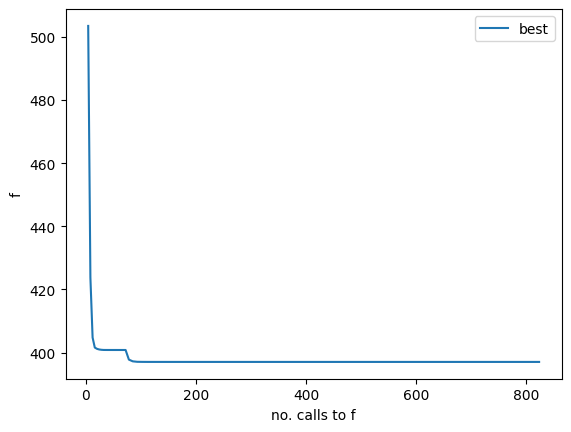

In [227]:
print_rec(res=res, fun=neural_network_cost, dim=len(res["x_best"]), 
          LB=LB, UB=UB , printlevel=printlevel, logscale = False)

#### Création de la fonction réseau de neurone avec poids optimaux

In [228]:
weights_best=vector_to_weights(res["x_best"],network_structure)

def RN(x):

    return forward_propagation(x,weights_best,used_activation).flatten()[0]

In [229]:
cost_function_mse(np.apply_along_axis(RN,1,simulated_data["data"]),simulated_data["target"])

np.float64(24.52479131395232)

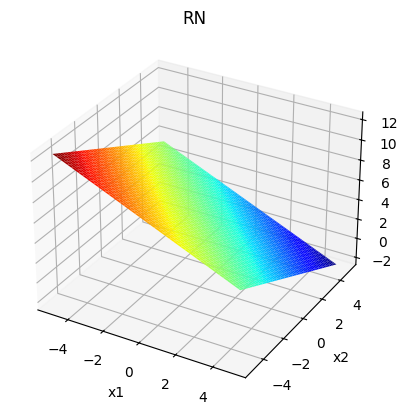

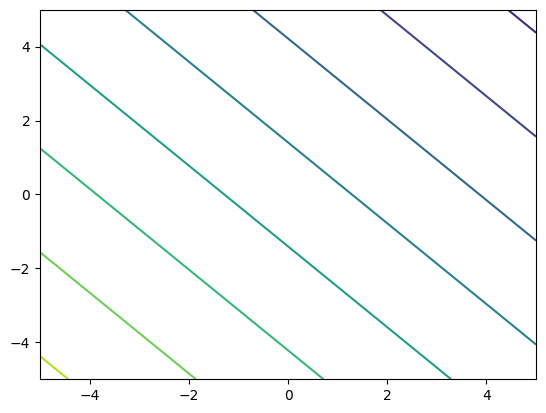

In [230]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = RN

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


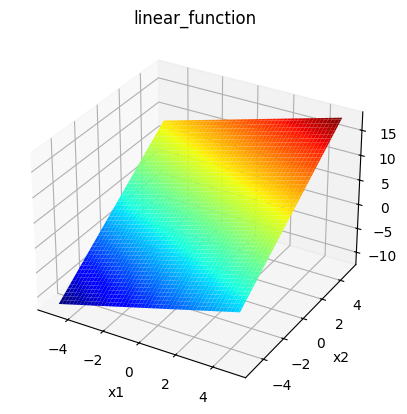

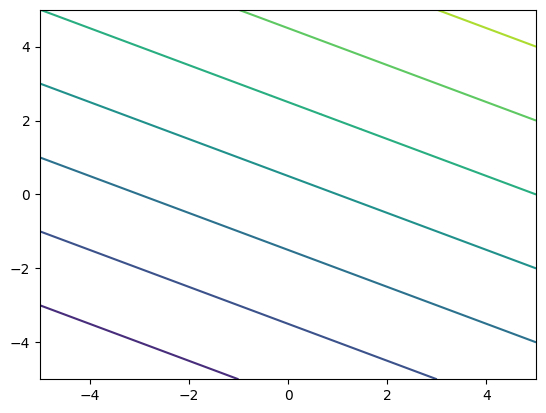

In [67]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = linear_function

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


# Partie 4: Réalisez votre propre réseau de neurone !  



#### Question 1
Générez un jeu de données associé à la fonction quadratique en dimension 2 avec 100 points de données.

In [199]:
used_function = quadratic
n_features = 2
n_obs = 100
LB = [-5] * n_features
UB = [5] * n_features
simulated_data = simulate_data_target(fun = used_function,
                                      n_features = n_features,
                                      n_obs=n_obs,LB=LB,UB=UB)

#### Question 2 
Créez un réseau de neurones (définition de la fonction coût, initialisation des poids, apprentissage)

In [231]:
### Structure du réseau

used_network_structure = [2,5,1]
used_activation = relu
used_data = simulated_data
used_cost_function = cost_function_mse


In [ ]:
### Définition de la fonction de coût


def neural_network_cost(vector_weights):
    
    cost = error_with_parameters(vector_weights,
                                 network_structure = used_network_structure,
                                 activation_function = used_activation,
                                 data = used_data,
                                 cost_function = used_cost_function)
    
    return cost

In [233]:
### Initialisation des poids

random_weights = create_weights(used_network_structure)
random_weights_as_vect,_ = weights_to_vector(random_weights)
dim_weights = len(random_weights_as_vect)

print("Vecteur des poids :",random_weights_as_vect)
print("Error :",neural_network_cost(random_weights_as_vect))
print("Dimension des poids :",dim_weights)

Vecteur des poids : [ 0.40428546 -0.07638312 -0.0424994  -0.16294048  0.17059403 -0.63355293
  0.19683152 -0.04989086  0.15913803  0.16092082 -1.41581563 -0.52036223
 -0.06271679 -0.03203426  0.14975849  0.12343317  0.61899966  0.12756064
 -0.12779139 -0.65283942 -0.55872458]
Error : 22.649855883829634
Dimension des poids : 21


In [203]:
### Implémentation de la descente de gradients


LB = [-5] * dim_weights
UB = [5] * dim_weights
printlevel = 1
res = gradient_descent(func = neural_network_cost,
                 start_x = random_weights_as_vect,
                 LB = LB, UB = UB,budget = 15000,printlevel=printlevel)

search stopped after 866 evaluations of f because of too small step 
best objective function = 397.0319257586765
best x = [-0.7774918  -0.71117586  5.        ]


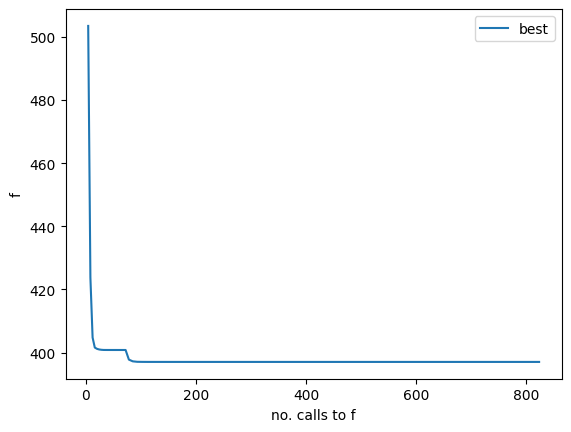

In [234]:
### Affichage de la convergence

print_rec(res=res, fun=neural_network_cost, dim=len(res["x_best"]), 
          LB=LB, UB=UB , printlevel=printlevel, logscale = False)

In [205]:
### Redéfinition de la fonction réseau de neurone

weights_best=vector_to_weights(res["x_best"],
                                used_network_structure)
def RN(x):

    return forward_propagation(x,weights_best,used_activation).flatten()[0]

In [206]:
cost_function_mse(np.apply_along_axis(RN,1,simulated_data["data"]).flatten(),simulated_data["target"])

np.float64(1.4488775543411447)

#### Question 3:
 Affichez la fonction de votre réseau de neurone sur un graphique en 3D. Affichez également la fonction avec laquelle vous avez crée le dataset initial. Concluez sur leur ressemblance.


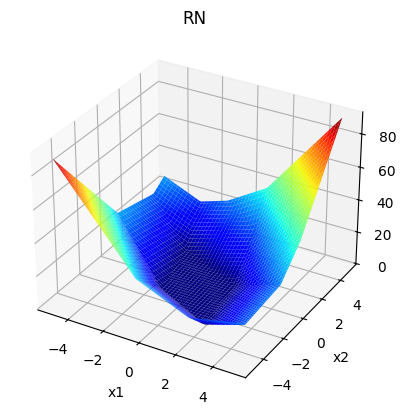

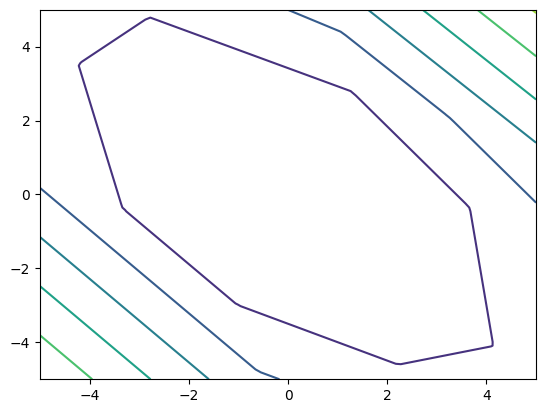

In [207]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = RN

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


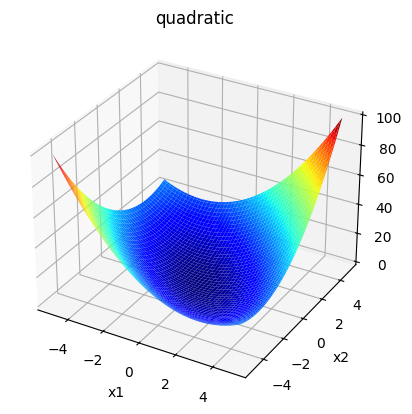

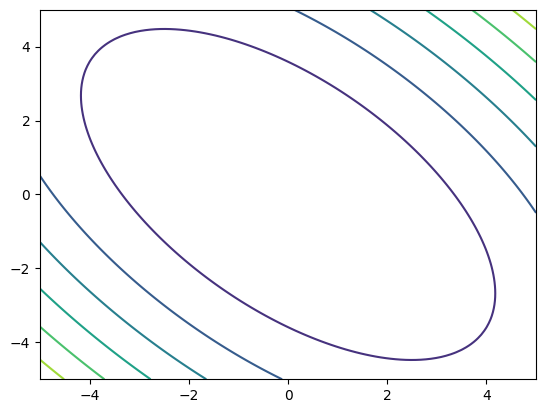

In [190]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = quadratic

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


# **FIN DU NOTEBOOK**
Bravo à tous, vous avez maintenant réussi à implémenter votre propre algorithme de descente du gradient, et savez créer un réseau de neurones !